In [2]:
from scipy.optimize import newton
from sklearn.utils.testing import assert_almost_equal

In [57]:
# the function 
def f(x):
    return 6*x**5-5*x**4-4*x**3+3*x**2

def df(x):
    return 30*x**4-20*x**3-12*x**2+6*x

# for root point f(r) = 0, evaluation of the current iteration abs(f(x0) - f(r)), i.e. abs(f(x0) - 0)
# stopping criteria evaluation 
def dx(f, x):
    return abs(0-f(x))

In [58]:
# start from some reasonable guess of the root x0
def newtons_method(f, df, x0, e, print_res=False):
    ite = [x0]
    delta = dx(f, x0)
    while delta > e:
        x1 = x0 - f(x0)/df(x0)
        ite.append(x1)
        x0 = x1
        delta = dx(f, x0)
    if print_res:
        print ('Root is at: ', x0)
        print ('f(x) at root is: ', f(x0))
        print ('Root finding process ', ite)
    return x0, ite

In [10]:
def test_with_scipy(f, df, x0s, e):
    for x0 in x0s:
        my_newton = newtons_method(f, df, x0, e)
        scipy_newton = newton(f, x0, df, tol=e)
        assert_almost_equal(my_newton, scipy_newton, decimal=5)
        print ('Tests passed.')

In [13]:
if __name__ == '__main__':
    # run test
    x0s = [0, 0.5, 1]    
    test_with_scipy(f, df, x0s, 1e-5)
        
    for x0 in x0s:
        newtons_method(f, df, x0, 1e-10, True)

Tests passed.
Tests passed.
Tests passed.
Root is at:  0
f(x) at root is:  0
Root is at:  0.6286669787778999
f(x) at root is:  -1.8043344596208044e-12
Root is at:  1
f(x) at root is:  0


C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\optimize\zeros.py:142: RuntimeWarning: derivative was zero.
  warnings.warn(msg, RuntimeWarning)


In [60]:
x0s = [0, 0.5, 1]   
root = [ ]
for x0 in x0s:
    newtons_method(f, df, x0, e = 1e-5, print_res= True)
    root.append(newtons_method(f, df, x0, e = 1e-5, print_res= False)[0])

Root is at:  0
f(x) at root is:  0
Root finding process  [0]
Root is at:  0.6286680781673306
f(x) at root is:  -1.3785387997788945e-06
Root finding process  [0.5, 0.7, 0.6296335078534031, 0.6286680781673306]
Root is at:  1
f(x) at root is:  0
Root finding process  [1]


In [61]:
root

[0, 0.6286680781673306, 1]

In [31]:
import matplotlib.pyplot as plt 
% matplotlib inline
import numpy as np

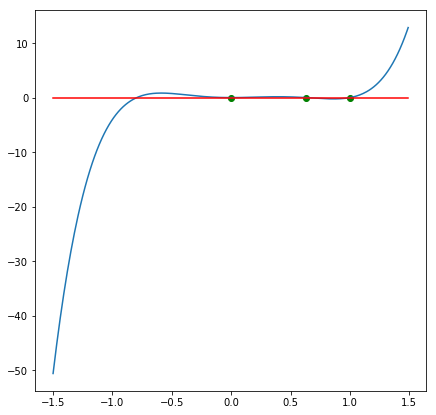

In [66]:
# f(x) = 6*x**5 - 5*x**4 - 4*x**3 + 3*x**2
# df(x) = 30*x**4 - 20*x**3 - 12*x**2 + 6*x
# roots to f(x) are stored in root 

xval = np.arange(-1.5, 1.5, .01) #  Grid of 0.01 spacing from -2 to 2
yval = f(xval) # evaluate the function at xval 

fig = plt.figure(figsize = (7,7))
plt.plot(xval, yval) # Create line plot with yvals against xvals
plt.plot(xval, np.zeros(len(xval)), color = 'red')
plt.scatter(x = root, y = np.zeros(len(root)), color = 'green')
plt.show()